In [1]:
import os
import glob

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

# Fourier transform

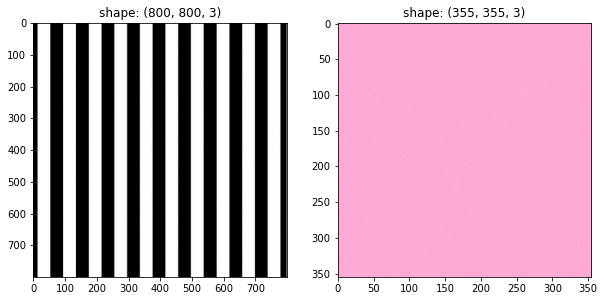

In [2]:
image_striped = cv2.imread('images/stripes.jpg')
image_striped = cv2.cvtColor(image_striped, cv2.COLOR_BGR2RGB)

image_solid = cv2.imread('images/pink_solid.jpg')
image_solid = cv2.cvtColor(image_solid, cv2.COLOR_BGR2RGB)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(image_striped)
ax1.set_title('shape: ' + str(image_striped.shape))

ax2.imshow(image_solid)
ax2.set_title('shape: ' + str(image_solid.shape))
plt.show()

<class 'numpy.ndarray'>


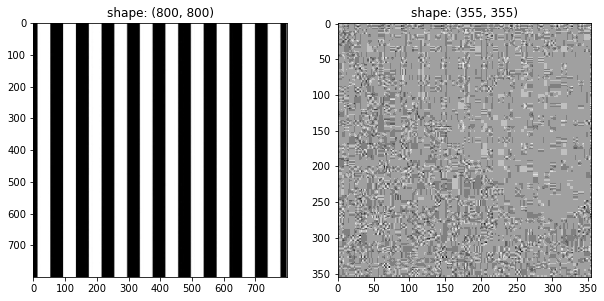

In [3]:
# convert to grayscale
gray_stripes = cv2.cvtColor(image_striped, cv2.COLOR_RGB2GRAY)
gray_solid = cv2.cvtColor(image_solid, cv2.COLOR_RGB2GRAY)

print(type(gray_stripes))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(gray_stripes, cmap='gray')
ax1.set_title('shape: ' + str(gray_stripes.shape))

ax2.imshow(gray_solid, cmap='gray')
ax2.set_title('shape: ' + str(gray_solid.shape))
plt.show()



In [4]:
gray_solid.shape

(355, 355)

In [5]:
# normalize the image color values from a range of [0,255] to [0,1] for further processing
norm_stripes = gray_stripes/255
norm_solid = gray_solid/255

# perform a fast fourier transform and create a scaled, frequency transform image
def ft_image(norm_image):
    '''This function takes in a normalized, grayscale image
       and returns a frequency spectrum transform of that image. '''
    f = np.fft.fft2(norm_image)
    fshift = np.fft.fftshift(f)
    frequency_tx = 20*np.log(np.abs(fshift))
    
    return frequency_tx

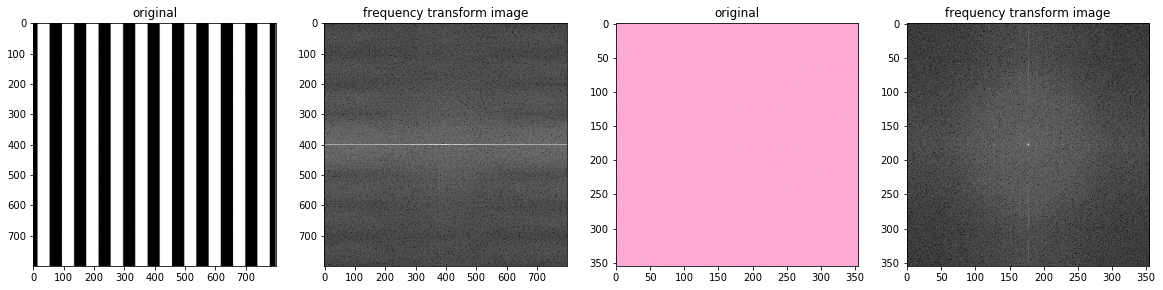

In [6]:
f_stripes = ft_image(norm_stripes)
f_solid = ft_image(norm_solid)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 10))

ax1.imshow(image_striped)
ax1.set_title('original')

ax2.imshow(f_stripes, cmap='gray')
ax2.set_title('frequency transform image')

ax3.imshow(image_solid)
ax3.set_title('original')

ax4.imshow(f_solid, cmap='gray')
ax4.set_title('frequency transform image')


plt.show()

Low frequencies are at the center of the frequency transform image. 

The transform images for these example show that the solid image has most low-frequency components (as seen by the center bright spot). 

The stripes tranform image contains low-frequencies for the areas of white and black color and high frequencies for the edges in between those colors. The stripes transform image also tells us that there is one dominating direction for these frequencies; vertical stripes are represented by a horizontal line passing through the center of the frequency transform image.

Next, let's see what this looks like applied to a real-world image.

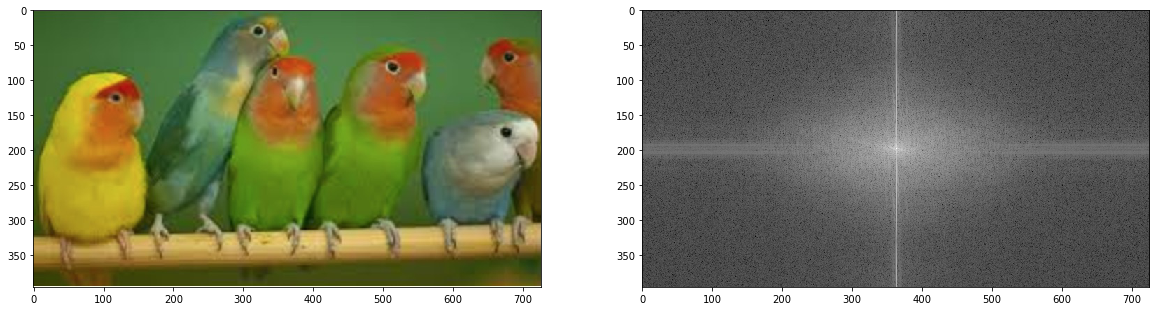

In [7]:
# Read in an image
image = cv2.imread('images/birds.jpg')
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# normalize the image
norm_image = gray/255.0

f_image = ft_image(norm_image)

# Display the images
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.imshow(image)
ax2.imshow(f_image, cmap='gray')

Notice that this image has components of all frequencies. You can see a bright spot in the center of the transform image, which tells us that a large portion of the image is low-frequency; this makes sense since the body of the birds and background are solid colors. The transform image also tells us that there are two dominating directions for these frequencies; vertical edges (from the edges of birds) are represented by a horizontal line passing through the center of the frequency transform image, and horizontal edges (from the branch and tops of the birds' heads) are represented by a vertical line passing through the center.

# High pass filter

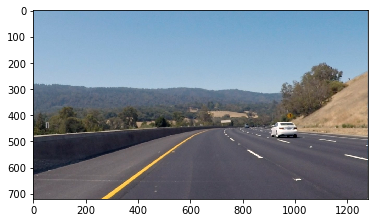

In [8]:
# read the image
im = mpimg.imread('images/curved_lane.jpg')
plt.imshow(im)

(720, 1280)


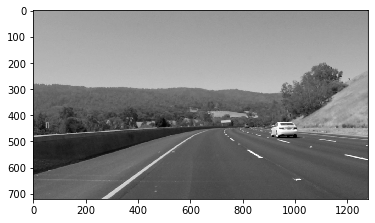

In [9]:
# convert to grayscale
im_gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
print(im_gray.shape)
plt.imshow(im_gray, cmap='gray')

## Sobel filter

The Sobel filter is very commonly used in edge detection and in finding patterns in intensity in an image. Applying a Sobel filter to an image is a way of **taking (an approximation) of the derivative of the image** in the x or y direction, separately. The operators look as follows.

<img src="images/sobel_ops.png" width=200 height=200>


[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]
---
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


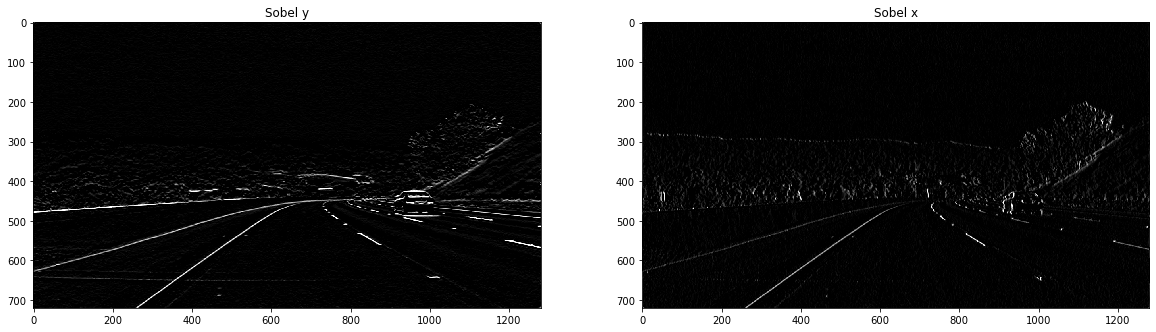

In [10]:
# sobel filters
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

sobel_x = np.transpose(sobel_y)

print(sobel_y)
print('---')
print(sobel_x)


filtered_image_y = cv2.filter2D(im_gray, -1, sobel_y)
filtered_image_x= cv2.filter2D(im_gray, -1, sobel_x)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.imshow(filtered_image_y, cmap='gray')
ax1.set_title('Sobel y')


ax2.imshow(filtered_image_x, cmap='gray')
ax2.set_title('Sobel x')

plt.show()

Taking the gradient in the xx direction emphasizes edges closer to vertical. Alternatively, taking the gradient in the yy direction emphasizes edges closer to horizontal

In [11]:
# other filter
filter2 = np.zeros((5,5))
a = np.array([-1, -1, -1, 0, 0, 0, 1, 1, 1]).reshape(3,3)
filter2[1:4, 1:4] = a
filter2


array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0., -1., -1., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  1.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

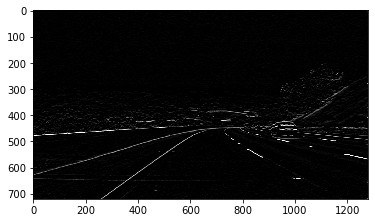

In [12]:
filtered_image2 = cv2.filter2D(im_gray, -1, filter2)
plt.imshow(filtered_image2, cmap='gray')

# Gaussian Blur, loss pass filter

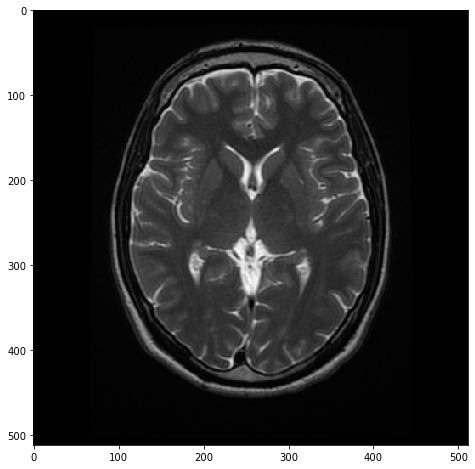

In [13]:
# load brain image
brain = mpimg.imread('images/brain_MR.jpg')
# convert rgb to gray
gray_brain = cv2.cvtColor(brain, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(8, 8))
plt.imshow(gray_brain, cmap='gray')

### Averaging filter

In [14]:
averaging_filter = np.ones((3,3))/9
averaging_filter

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

Text(0.5, 1.0, 'filtered image')

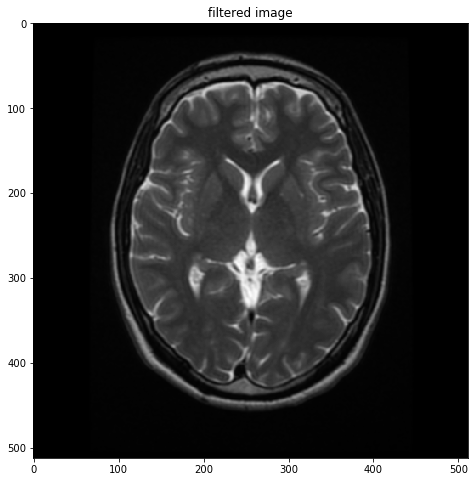

In [15]:
# filter image
filtered_image = cv2.filter2D(gray_brain, -1, averaging_filter)

plt.figure(figsize=(8, 8))
plt.imshow(filtered_image, cmap='gray')
plt.title('filtered image')

### Gaussian blur

Text(0.5, 1.0, 'Blur')

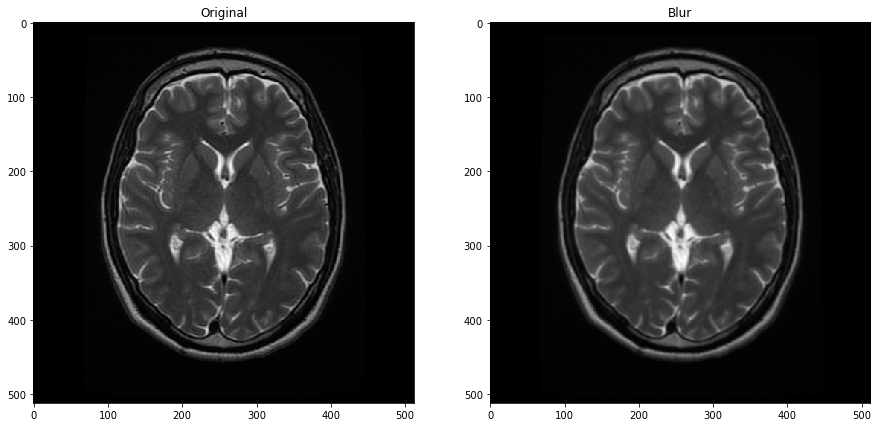

In [16]:
gray_blur = cv2.GaussianBlur(gray_brain, (5,5), 0)

plt.figure(figsize=(15, 8))

plt.subplot(121)
plt.imshow(gray_brain, cmap='gray')
plt.title('Original')

plt.subplot(122)
plt.imshow(gray_blur, cmap='gray')
plt.title('Blur')

### Test performance with high-pass filter

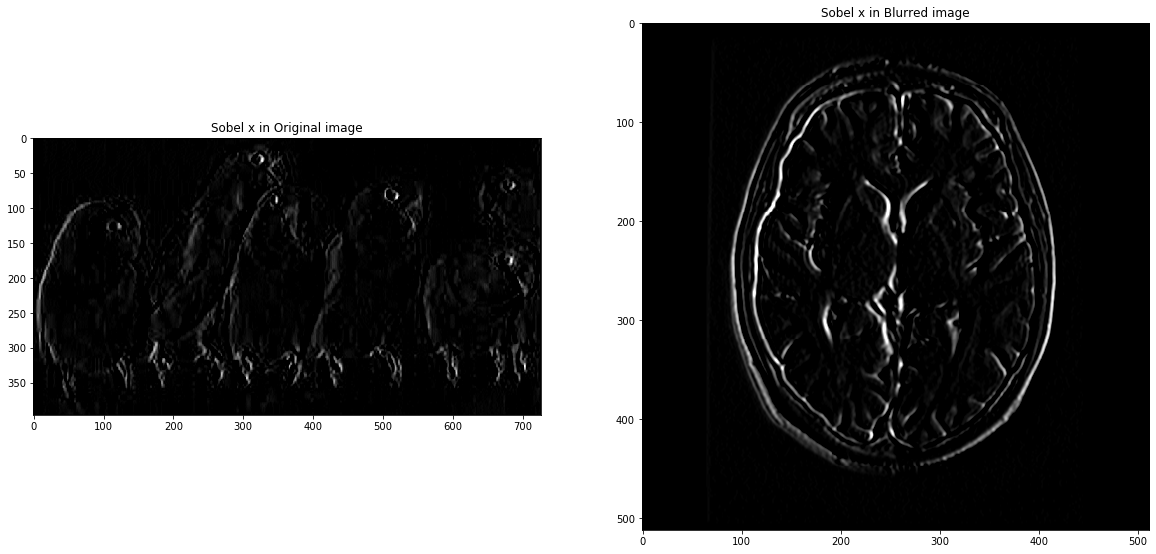

In [17]:
filtered = cv2.filter2D(gray, -1, sobel_x)
filtered_blurred = cv2.filter2D(gray_blur, -1, sobel_x)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.imshow(filtered, cmap='gray')
ax1.set_title('Sobel x in Original image')


ax2.imshow(filtered_blurred, cmap='gray')
ax2.set_title('Sobel x in Blurred image')

plt.show()

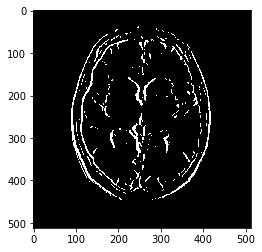

In [18]:
# Create threshold that sets all the filtered pixels to white
# Above a certain threshold

retval, binary_image = cv2.threshold(filtered_blurred, 50, 255, cv2.THRESH_BINARY)

plt.imshow(binary_image, cmap='gray')

# Fourier Transform of Filters

Now, you might be wondering, what makes filters high and low-pass; why is a Sobel filter high-pass and a Gaussian filter low-pass?

Well, you can actually visualize the frequencies that these filters block out by taking a look at their fourier transforms. The frequency components of any image can be displayed after doing a Fourier Transform (FT). An FT looks at the components of an image (edges that are high-frequency, and areas of smooth color as low-frequency), and plots the frequencies that occur as points in spectrum. So, let's treat our filters as small images, and display them in the frequency domain!

In [19]:
gaussian = (1/9)*np.array([[1, 1, 1],
                           [1, 1, 1],
                           [1, 1, 1]])

sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])

# laplacian, edge filter
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [gaussian, sobel_x, sobel_y, laplacian]
filter_name = ['gaussian', 'sobel_x', 'sobel_y', 'laplacian']

f_filters = [np.fft.fft2(x) for x in filters]
fshift = [np.fft.fftshift(x) for x in f_filters]
frequency_tx = [np.log(np.abs(x) + 1) for x in fshift]

frequency_tx

[array([[0.        , 0.        , 0.        ],
        [0.        , 0.69314718, 0.        ],
        [0.        , 0.        , 0.        ]]),
 array([[1.00505254, 0.        , 1.00505254],
        [2.07042643, 0.        , 2.07042643],
        [1.00505254, 0.        , 1.00505254]]),
 array([[1.00505254, 2.07042643, 1.00505254],
        [0.        , 0.        , 0.        ],
        [1.00505254, 2.07042643, 1.00505254]]),
 array([[1.94591015, 1.38629436, 1.94591015],
        [1.38629436, 0.        , 1.38629436],
        [1.94591015, 1.38629436, 1.94591015]])]

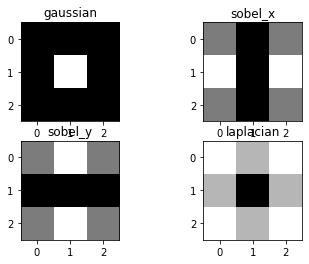

In [20]:
# display 4 filters
for i in range(len(filters)):
    plt.subplot(2, 2, i+1)
    plt.imshow(frequency_tx[i], cmap='gray')
    plt.title(filter_name[i])


In [21]:
# images .png
image_dir = 'images/'

glob.glob(os.path.join(image_dir, '*png'))

['images\\city_hall_zoom.png', 'images\\sobel_ops.png']

In [22]:
# images .jpg
image_dir = 'images/'

glob.glob(os.path.join(image_dir, '*jpg'))

['images\\0.4_a.jpg',
 'images\\birds.jpg',
 'images\\brain_MR.jpg',
 'images\\city_hall.jpg',
 'images\\curved_lane.jpg',
 'images\\face1.jpg',
 'images\\face2.jpg',
 'images\\multi_faces.jpg',
 'images\\phone.jpg',
 'images\\pink_solid.jpg',
 'images\\round_farms.jpg',
 'images\\stripes.jpg',
 'images\\sunflower.jpg']

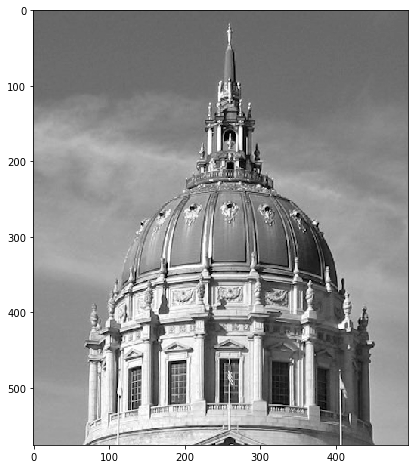

In [23]:
image_hall = mpimg.imread('images\\city_hall_zoom.png')
image = cv2.cvtColor(image_hall, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(8, 8))
plt.imshow(image, cmap='gray')

In [24]:
image_hall

array([[[0.16470589, 0.4627451 , 0.72156864, 1.        ],
        [0.1764706 , 0.45490196, 0.7176471 , 1.        ],
        [0.17254902, 0.45490196, 0.7176471 , 1.        ],
        ...,
        [0.18039216, 0.44705883, 0.7294118 , 1.        ],
        [0.18431373, 0.4509804 , 0.73333335, 1.        ],
        [0.18039216, 0.4509804 , 0.73333335, 1.        ]],

       [[0.16862746, 0.4627451 , 0.7254902 , 1.        ],
        [0.1764706 , 0.4509804 , 0.7176471 , 1.        ],
        [0.1764706 , 0.4509804 , 0.72156864, 1.        ],
        ...,
        [0.18039216, 0.44705883, 0.73333335, 1.        ],
        [0.18431373, 0.44705883, 0.73333335, 1.        ],
        [0.18039216, 0.44705883, 0.73333335, 1.        ]],

       [[0.17254902, 0.45882353, 0.7254902 , 1.        ],
        [0.1764706 , 0.4509804 , 0.7176471 , 1.        ],
        [0.1764706 , 0.4509804 , 0.7176471 , 1.        ],
        ...,
        [0.18431373, 0.4509804 , 0.7372549 , 1.        ],
        [0.18431373, 0.450980

In [25]:
image.shape

(576, 496)

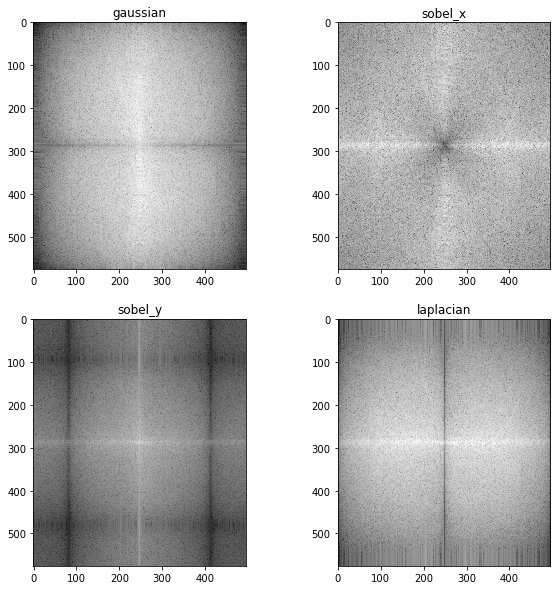

In [26]:
image_filters = [cv2.filter2D(image, -1, filter_) for filter_ in filters]
image_ft = ft_image(image_filters)

plt.figure(figsize=(10, 10))
for i in range(len(image_ft)):
    plt.subplot(2, 2, i+1)
    plt.imshow(image_ft[i], cmap='gray')
    plt.title(filter_name[i])


# Cany Edge Detector

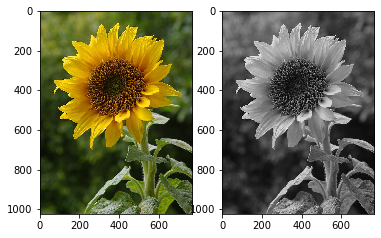

In [27]:
image = mpimg.imread('images/sunflower.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

f, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(image)
ax2.imshow(gray, cmap='gray')

### Implement Canny edge detection

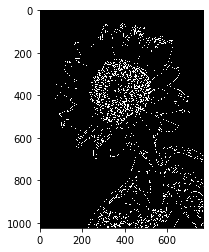

In [28]:
# lower and upper thresholds. they should be 1:2 or 1:3 to best results
lower = 120
upper = 240

edges = cv2.Canny(gray, lower, upper)

plt.imshow(edges, cmap='gray')

Text(0.5, 1.0, 'tight')

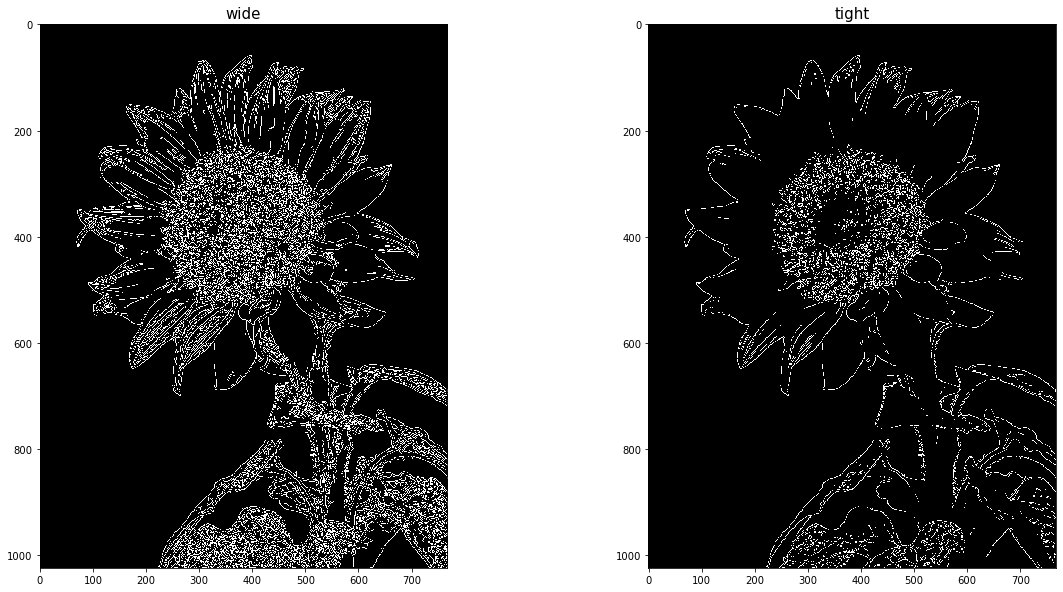

In [29]:
# try Canny using wide and tight thresholds
wide = cv2.Canny(gray, 30, 100)
tight = cv2.Canny(gray, 180, 240)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.imshow(wide, cmap='gray')
ax1.set_title('wide', fontsize=15)

ax2.imshow(tight, cmap='gray')
ax2.set_title('tight', fontsize=15)

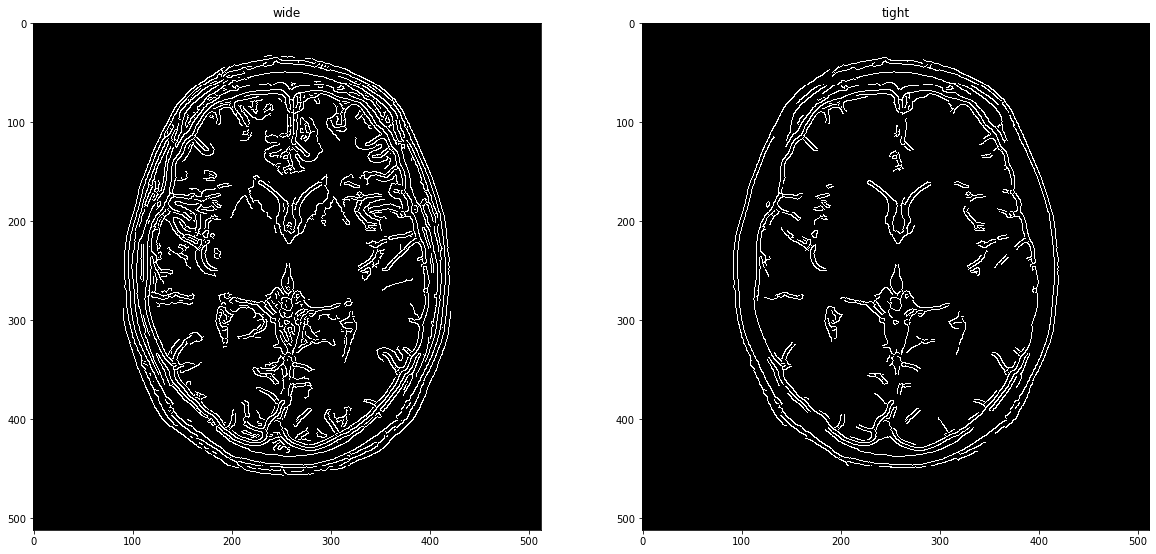

In [31]:
wide = cv2.Canny(gray_brain, 30, 100)
tight = cv2.Canny(gray_brain, 120, 240)
 
# Display the images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('wide')
ax1.imshow(wide, cmap='gray')

ax2.set_title('tight')
ax2.imshow(tight, cmap='gray')